In [2]:
from sklearn  import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

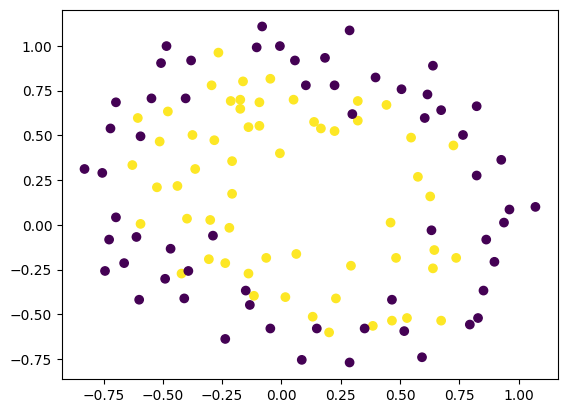

In [3]:
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")

x_data = data[:, : -1]
y_data = data[:, -1]

plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
plt.show()

In [6]:
x_train , x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5) # 分割数据集，20%为测试数据


In [7]:
def plot(model):
    x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1
    
    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
    z = z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, z)
    plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
    plt.show()

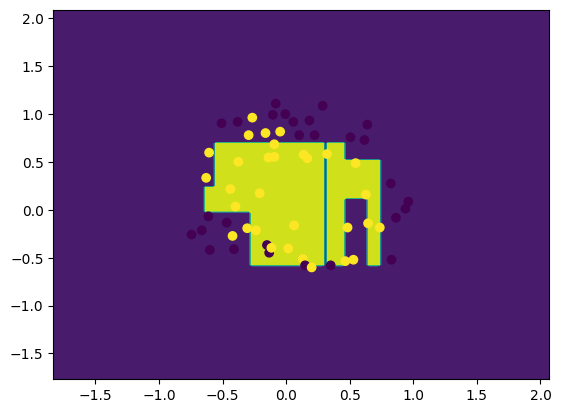

0.7627118644067796

In [8]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)
plot(dtree)
dtree.score(x_test, y_test)

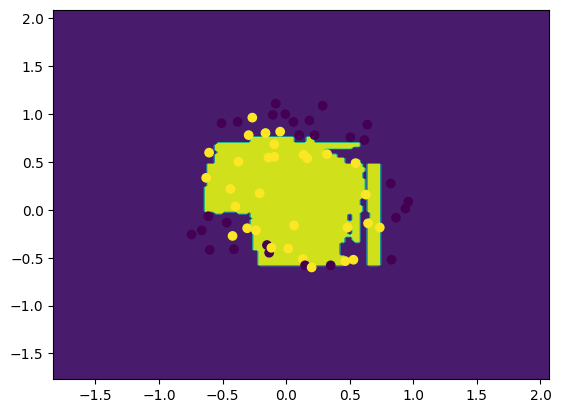

0.7457627118644068

In [9]:
RF = RandomForestClassifier(n_estimators=50)

RF.fit(x_train, y_train)

plot(RF)

RF.score(x_test, y_test)